#### Segmentação Watershed

##### tutorial opencv -> image segmentation with watershed algorithim

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

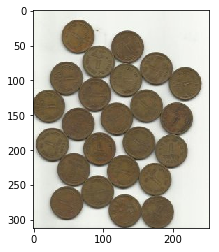

In [2]:
img = cv2.imread('coins.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

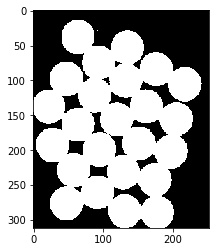

In [3]:
#Obtém a imagem binarizada
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh,cmap = 'gray')

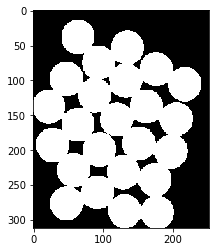

In [4]:
#Abertura para retirar possíveis ruídos
kernel = np.ones((3,3),np.uint8)
open = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
plt.imshow(open,cmap = 'gray')

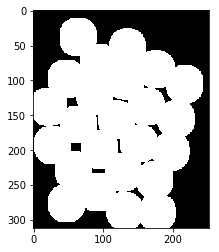

In [6]:
#Dilatação para obter a área que certamente será o background (preto) 
sure_bg = cv2.dilate(open,kernel,iterations=3)
plt.imshow(sure_bg,cmap = 'gray')

In [7]:
#Transformação da distância para obter as áreas que certamente são moedas
dist_transform = cv2.distanceTransform(open,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

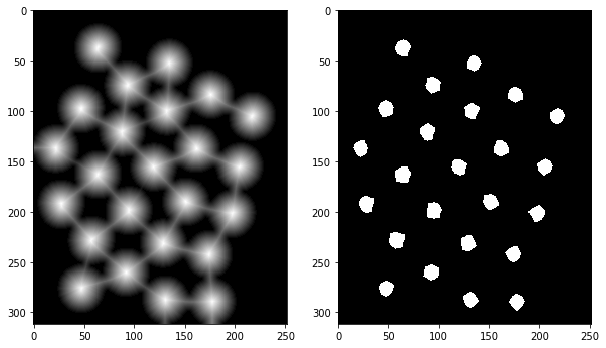

In [15]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(dist_transform,cmap = 'gray')

plt.subplot(1,2,2)
plt.imshow(sure_fg,cmap = 'gray')

In [10]:
#Foreground representa a área das moedas e unknown a dilatação - fg que é a inderterminada
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [11]:
#Componentes conectados para determinar cadsa moeda
ret,markers = cv2.connectedComponents(sure_fg)
#Para atribuir um valor para o background diferente de zero
markers = markers+1
#Atriubui os valores inderterminados o valor zero
markers[unknown == 255] = 0


In [12]:
#Aplica o watershed
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

Text(0.5, 1.0, 'imagem')

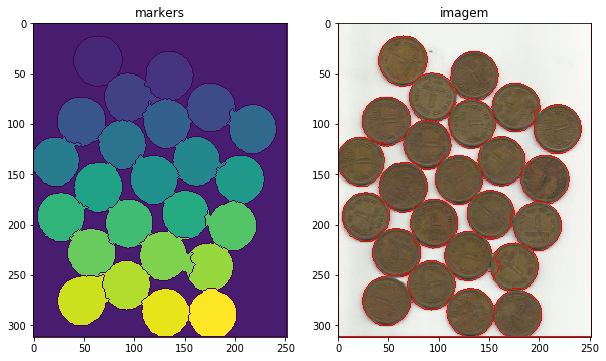

In [14]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(markers)
plt.title('markers')

plt.subplot(1,2,2)
plt.imshow(img)
plt.title('imagem')